In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
import tensorflow as tf
from matplotlib import image as lib

img_row, img_col = 100,100
shape = (img_row, img_col, 1)
numClass=2

img =[]
for i in range(3, 12):
    name='garbage/image'+str(i)+'.jpeg'
    timg = lib.imread(name)
    img.append(timg[:,:,1])
    print(name)
img = np.asarray(img)
img=img.reshape(img.shape[0], img_row, img_col, 1)
input_shape=(img_row, img_col, 1)
img.astype(np.float32)
img = img/255

label = np.loadtxt('garbage/label.txt',dtype=int,delimiter=',')
label = keras.utils.to_categorical(label, 2)
print(np.shape(label))


img_train, res_train, img_test, res_test = (img[:7], label[:7], img[7:10], label[7:10])
boardcallback = keras.callbacks.TensorBoard(log_dir='garbage/log/graph')
model = Sequential()
model.add(Conv2D(32,kernel_size=5, activation='relu', input_shape=shape))
model.add(MaxPooling2D(pool_size=(5,5)))
model.add(Dropout(0.20))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(.50))
model.add(Dense(numClass, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(img_train, res_train,
          batch_size=128,
          epochs=5,
          verbose=1,
          validation_data=(img_test, res_test),
          callbacks=[boardcallback])


score=model.evaluate(img_test, res_test, verbose=0)
model.save('garbage/withCallback.h5')

W1112 11:08:12.186013 12384 deprecation_wrapper.py:119] From C:\Users\Assessioner\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:47: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1112 11:08:12.247466 12384 deprecation_wrapper.py:119] From C:\Users\Assessioner\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:349: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1112 11:08:12.264331 12384 deprecation_wrapper.py:119] From C:\Users\Assessioner\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3147: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1112 11:08:12.329273 12384 deprecation_wrapper.py:119] From C:\Users\Assessioner\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3014: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1112 11:08:12.350978 12384 deprecation.py:506] From C:

garbage/image3.jpeg
garbage/image4.jpeg
garbage/image5.jpeg
garbage/image6.jpeg
garbage/image7.jpeg
garbage/image8.jpeg
garbage/image9.jpeg
garbage/image10.jpeg
garbage/image11.jpeg
(9, 2)


W1112 11:08:12.415244 12384 deprecation.py:506] From C:\Users\Assessioner\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1062: calling reduce_prod_v1 (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
W1112 11:08:12.555531 12384 deprecation_wrapper.py:119] From C:\Users\Assessioner\Anaconda3\lib\site-packages\keras\optimizers.py:675: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1112 11:08:12.563971 12384 deprecation.py:506] From C:\Users\Assessioner\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:2550: calling reduce_sum_v1 (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
W1112 11:08:12.578235 12384 deprecation_wrapper.py:119] From C:\Users\Assessi

Train on 7 samples, validate on 2 samples


W1112 11:08:20.732881 12384 deprecation_wrapper.py:119] From C:\Users\Assessioner\Anaconda3\lib\site-packages\keras\callbacks.py:628: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W1112 11:08:20.733916 12384 deprecation_wrapper.py:119] From C:\Users\Assessioner\Anaconda3\lib\site-packages\keras\callbacks.py:631: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.



Epoch 1/5
7/7 [==============================] - 5s - loss: 0.7485 - acc: 0.2857 - val_loss: 0.6210 - val_acc: 0.5000
Epoch 2/5
7/7 [==============================] - 0s - loss: 0.6352 - acc: 0.7143 - val_loss: 0.5685 - val_acc: 0.5000
Epoch 3/5
7/7 [==============================] - 0s - loss: 0.6347 - acc: 0.5714 - val_loss: 0.5075 - val_acc: 1.0000
Epoch 4/5
7/7 [==============================] - 0s - loss: 0.4291 - acc: 1.0000 - val_loss: 0.4703 - val_acc: 1.0000
Epoch 5/5
7/7 [==============================] - 0s - loss: 0.4142 - acc: 1.0000 - val_loss: 0.4323 - val_acc: 1.0000


In [37]:
import tensorflow as tf

c = tf.lite.TFLiteConverter.from_keras_model_file('garbage/newKeras.h5')
m = c.convert()
open('garbage/tm.tflite','wb').write(m)

W1110 12:04:25.538975 12216 hdf5_format.py:258] Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
W1110 12:04:26.039410 12216 deprecation.py:323] From C:\Users\Assessioner\Anaconda3\lib\site-packages\tensorflow\lite\python\util.py:238: convert_variables_to_constants (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
W1110 12:04:26.040446 12216 deprecation.py:323] From C:\Users\Assessioner\Anaconda3\lib\site-packages\tensorflow\python\framework\graph_util_impl.py:270: extract_sub_graph (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`


2963040

In [6]:
import tensorflow as tf
import numpy as np
from matplotlib.image import imread

def load_graph(file):
    with tf.gfile.GFile(file,'rb') as file:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(file.read())
        
    with tf.Graph().as_default() as graph:
        tf.import_graph_def(
            graph_def, 
            name='prefix'
        )
    i = graph.get_operations()[0].name+':0'
    o = graph.get_operations()[-1].name+':0'
    nodes = [v for v in graph_def.node]
    names = []
    for t in nodes:
        names.append(t.name)
    print(names)
    return graph, i, o

load_graph('garbage/CorC.pb')

['conv2d_1/kernel', 'conv2d_1/bias', 'keras_learning_phase/input', 'keras_learning_phase', 'dense_1/kernel', 'dense_1/bias', 'dense_2/kernel', 'dense_2/bias', 'Adadelta/learning_rate', 'Adadelta/decay', 'Adadelta/iterations', 'total', 'count', 'training/Adadelta/accumulator_0_1', 'training/Adadelta/accumulator_1_1', 'training/Adadelta/accumulator_2_1', 'training/Adadelta/accumulator_3_1', 'training/Adadelta/accumulator_4_1', 'training/Adadelta/accumulator_5_1', 'training/Adadelta/delta_accumulator_0_1', 'training/Adadelta/delta_accumulator_1_1', 'training/Adadelta/delta_accumulator_2_1', 'training/Adadelta/delta_accumulator_3_1', 'training/Adadelta/delta_accumulator_4_1', 'training/Adadelta/delta_accumulator_5_1', 'conv2d_1_1/kernel', 'conv2d_1_1/bias', 'dense_1_1/kernel', 'dense_1_1/bias', 'dense_2_1/kernel', 'dense_2_1/bias', 'Adadelta_1/learning_rate', 'Adadelta_1/decay', 'Adadelta_1/iterations', 'total_1', 'count_1', 'training_1/Adadelta/accumulator_0_1', 'training_1/Adadelta/accum

(<tensorflow.python.framework.ops.Graph at 0x23153fa4518>,
 'prefix/conv2d_1/kernel:0',
 'prefix/training_3/Adadelta/delta_accumulator_5_1:0')

In [12]:
from keras.models import load_model
from matplotlib.image import imread
import numpy as np
img = []
for i in range(9):
    n = i+47
    t = imread('garbage/num/image'+str(n)+'.jpeg')
    img.append(t[:,:,0])
img = np.asarray(img)
img = img.reshape(img.shape[0], 28,28,1)
print(img.shape)
model = load_model('garbage/mnistCNN.h5')
res = model.predict(img)


(9, 28, 28, 1)
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 7.6104897e-19 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 3.0787509e-36 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 5.1783474e-14 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.0103385e-28 0.0000000e+00 1.0000000e+00

In [39]:
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from keras.models import load_model
from matplotlib.image import imread
from keras.datasets.mnist import load_data
(x_train, y_train), (x_test, y_test) = load_data()
lst = x_train
'''for i in range(3):
    img = imread('garbage/num/image' + str(i+52) + '.jpeg')
    gray = rgb2gray(img)
    lst.append(gray)'''
x_train = np.asarray(x_train)
print(x_train.shape)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
print(x_train.shape)
x_train = x_train.astype('float32')
x_train /= 255
model=load_model('garbage/models/retrained.h5')
pre = model.predict(x_train[0:3])
print('res ', pre)
print('act ', y_train[0:3])

(60000, 28, 28)
(60000, 28, 28, 1)
res  [[4.53725425e-12 5.25411004e-08 8.25262259e-09 1.78322829e-02
  1.42837036e-11 9.82057452e-01 1.72265349e-12 6.97482117e-09
  9.42054967e-09 1.10118388e-04]
 [9.99999881e-01 1.03878739e-10 5.80528976e-08 8.82231441e-11
  7.18288895e-09 1.03415497e-11 1.53986619e-08 2.28855379e-09
  1.90051197e-09 9.15772063e-08]
 [1.84740053e-11 1.25618881e-05 3.43615216e-06 2.07954010e-09
  9.99878287e-01 8.89216145e-10 2.86357014e-11 7.31993977e-09
  1.26727753e-06 1.04442028e-04]]
act  [5 0 4]


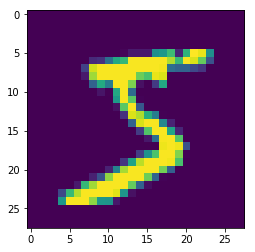

In [36]:
import matplotlib.pyplot as plt
from keras.datasets.mnist import load_data
(x_train, y_train), (x_test, y_test) = load_data()
plt.imshow(x_train[0])


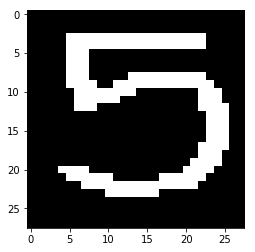

In [81]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np

def convertToBlackWhite(img):
    img = np.reshape(img, (28*28*3))
    tem = []
    for i in range(28*28):
        if(img[i*3+1] < 90) and (img[i*3+2] < 90):
            tem.append(0)
            tem.append(0)
            tem.append(0)

        else:
            tem.append(255)
            tem.append(255)
            tem.append(255)
    tem = np.asarray(tem)
    tem = np.reshape(tem, (28, 28, 3))
    return tem
'''for i in range(3):
    t = '''
img = imread('garbage/num/image54.jpeg')
img = convertToBlackWhite(img)

plt.imshow(img)

In [2]:
from keras.models import load_model
from matplotlib.image import imread
import numpy as np

def convertToBlackWhite(img):
    img = np.reshape(img, (28*28*3))
    tem = []
    started = False
    where = -1
    for i in range(28*28):
        if(img[i*3+1] < 90) and (img[i*3+2] < 90):
            tem.append(0)

        else:
            if not started:
                started = True
                where = i
            tem.append(255)
    tem = np.asarray(tem)
    tem = np.reshape(tem, (28, 28))
    return tem, where

model=load_model('garbage/models/retrained.h5')
t = []
where = []
for i in range(4):
    img = imread('garbage/num/image' + str(i+50) + '.jpeg')
    img, wh = convertToBlackWhite(img)
    t.append(img)
    where.append(wh)
t = np.asarray(t)
print(t.shape)
t=np.reshape(t, (4, 28, 28, 1))
pred = model.predict(t)
print(pred)
print(where)
#todo convert the image in 20 x 20 grid and than add padding to make 28x28 image

(4, 28, 28)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[87, 91, 99, 37]


[3 3 3 1]
[3, 7, 15, 9]
(21, 22, 3)


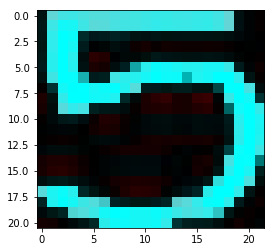

In [77]:
tx = []
ty = []
for i in where:
    tx.append(i/28)
tx=np.asarray(tx).astype(int)
print(tx)
for i in range(4):
    ty.append(where[i] - tx[i]*28)
print(ty)
test = imread('garbage/num/image51.jpeg')
test = test[3:24, 4:26,:]
print(test.shape)
import matplotlib.pyplot as plt
plt.imshow(test)
plt.show()

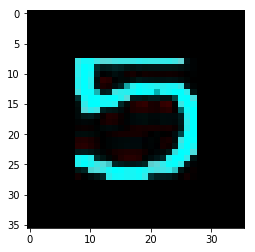

In [46]:
test = np.pad(test, ((4,4),(4,4),(0,0)), 'constant')
test.shape
plt.imshow(test)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=28x28 at 0x14735D36D68>
<PIL.Image.Image image mode=RGB size=22x21 at 0x14735D36EF0>
(19, 20, 3)
(29, 30, 3)


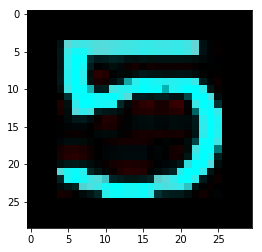

In [78]:
import PIL.Image as p
import PIL.ImageOps as helper
img = p.open('garbage/num/image54.jpeg')
print(img)
img2 = p.fromarray(test)
print(img2)
img2.thumbnail((20,20), PIL.Image.ANTIALIAS)


img2arr = np.asarray(img2)
print(img2arr.shape)
test = np.pad(test, ((4,4),(4,4),(0,0)), 'constant')
print(test.shape)
plt.imshow(test)

(28, 28, 3)


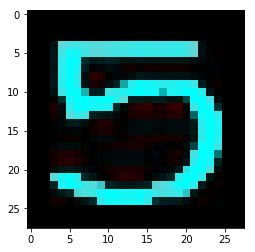

In [80]:
img = test[:28, 1:29, :]
print(img.shape)
plt.imshow(img)

(28, 28, 3)
17 0 3 20
(17, 17, 3)
(20, 20, 3)
(28, 28, 3)


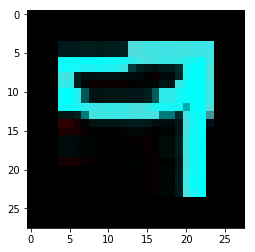

In [153]:
import PIL.Image as p
import numpy as np
import cv2
img = p.open('garbage/num/image51.jpeg')
img = np.asarray(img)
print(img.shape)
first = img[:,:,1]

#find biggest value from last in array of image
def bfl(first):
    s = -1
    for i in range(28):
        for j in range(28):
            if(first[i, j] > 10):
                if j > s:
                    s = j
    return s

def bff(first):
    s = 28
    for i in range(28):
        for j in range(28):
            if(first[i, j] > 10):
                if j < s:
                    s = j
                    
    return s

def fft(first):
    s = 0
    for i in range(28):
        for j in range(28):
            if(first[i, j] > 100):
                return i

def ffb(first):
    for i in range(28):
        for j in range(28):
            x=27-i
            y=27-j
            if first[x,y] > 100:
                return x

x = bfl(first)
y = bff(first)
z = fft(first)
w = ffb(first)
print('values of right , left, top and bottom', x, y, z, w)
img1 = img[z:w, y:x,:]
print(img1.shape)
reshape = cv2.resize(img1, (20,20), interpolation = cv2.INTER_NEAREST)
print(reshape.shape)
padd = np.pad(reshape, ((4,4),(4,4),(0,0)),'constant')
print(padd.shape)
plt.imshow(padd)

In [160]:
from keras.models import load_model
model=load_model('garbage/models/mnist.h5')
print(padd.shape)
padd = np.reshape(padd, (1,28,28,1))
print(padd.shape)

res = model.predict(padd)
print(res)

(1, 28, 28, 1)
(1, 28, 28, 1)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


from keras.models import load_model
from matplotlib.image import imread
import numpy as np
from matplotlib import pyplot as plt
model=load_model('garbage/models/mnist.h5')

#Actual process of how to feed number image to mnist neural network

#farthest point pixel of number on right
def bfl(first):
    s = -1
    for i in range(28):
        for j in range(28):
            if(first[i, j] > 10):
                if j > s:
                    s = j
    return s

#farthest point pixel of number on left
def bff(first):
    s = 28
    for i in range(28):
        for j in range(28):
            if(first[i, j] > 10):
                if j < s:
                    s = j
                    
    return s

#first pixel of number on top
def fft(first):
    s = 0
    for i in range(28):
        for j in range(28):
            if(first[i, j] > 100):
                return i

#first pixel of number from bottom
def ffb(first):
    for i in range(28):
        for j in range(28):
            x=27-i
            y=27-j
            if first[x,y] > 100:
                return x
            
#format image to meet requirement to feed mnist model
def magic(img):
    first = img[:,:,1]
    x = bfl(first)
    y = bff(first)
    z = fft(first)
    w = ffb(first)
    print(x, y, z, w)
    img = img[z:w, y:x,:]
    print('actual size of number in image ',img.shape)
    print('done extracting number pixels')
    #plt.imshow(img)
    import cv2

    resize = cv2.resize(img, (20,20), interpolation=cv2.INTER_NEAREST)
    print('after resizing image',resize.shape)
    #plt.imshow(resize)
    padd = np.pad(resize, ((4,4),(4,4),(0,0)), 'constant')
    plt.imshow(padd)
    plt.show()
    return padd

feed=imread('garbage/num/image116.jpeg')
#feed = magic(img)plt.imshow(padd)
plt.imshow(feed)
plt.show()
feed = np.reshape(feed[:,:,1], (1,28,28,1))
print('shape of feed',feed.shape)
res = model.predict(feed)
print(res)

In [ ]:
from keras.models import load_model 
from matplotlib.image import imread 
import numpy as np 
from matplotlib import pyplot as plt 

model=load_model('garbage/models/mnist.h5')

#Actual process of how to feed number image to mnist neural network

#farthest point pixel of number on right 
def bfl(first): 
    s = -1 
    for i in range(28): 
        for j in range(28): 
            if(first[i, j] > 10): 
                if j > s: 
                    s = j 
                    return s

#farthest point pixel of number on left 
def bff(first): 
    s = 28 
    for i in range(28): 
        for j in range(28): 
            if(first[i, j] > 10): 
                if j < s: 
                    s = j

return s

#first pixel of number on top 
def fft(first): 
    s = 0 
    for i in range(28): 
        for j in range(28): 
            if(first[i, j] > 100): 
                return i

#first pixel of number from bottom 
def ffb(first): 
    for i in range(28): 
        for j in range(28): 
            x=27-i 
            y=27-j 
            if first[x,y] > 100: 
                return x

#format image to meet requirement to feed mnist model 
def magic(img): 
    first = img[:,:,1] 
    x = bfl(first) 
    y = bff(first) 
    z = fft(first) 
    w = ffb(first) 
    print(x, y, z, w) 
    img = img[z:w, y:x,:] 
    print('actual size of number in image ',img.shape) 
    print('done extracting number pixels')

    #plt.imshow(img)
    import cv2

    resize = cv2.resize(img, (20,20), interpolation=cv2.INTER_NEAREST)
    print('after resizing image',resize.shape)
    #plt.imshow(resize)
    padd = np.pad(resize, ((4,4),(4,4),(0,0)), 'constant')
    plt.imshow(padd)
    plt.show()
    return padd

feed=imread('garbage/num/image116.jpeg')

#feed = magic(img)
plt.imshow(padd) 
plt.imshow(feed) 
plt.show() 
feed = np.reshape(feed[:,:,1], (1,28,28,1)) 
print('shape of feed',feed.shape) 
res = model.predict(feed) 
print(res)


get the details  [ 1 28 28  1]
24 3 6 19
actual size of number in image  (13, 21, 3)
done extracting number pixels
after resizing image (20, 20, 3)


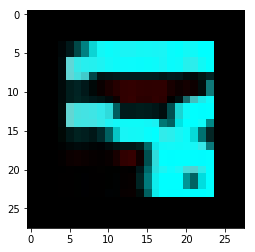

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [10]:
import numpy as np
import tensorflow as tf

interpretor = tf.lite.Interpreter('garbage/models/mnist.tflite')
interpretor.allocate_tensors()

ipdetail=interpretor.get_input_details()
opdetail=interpretor.get_output_details()

input_shape=ipdetail[0]['shape']

print('get the details ' , input_shape)

from matplotlib.image import imread 
from matplotlib import pyplot as plt 


#Actual process of how to feed number image to mnist neural network

#farthest point pixel of number on right 
def bfl(first): 
    s = -1 
    for i in range(28): 
        for j in range(28): 
            if(first[i, j] > 10): 
                if j > s: 
                    s = j 
    return s

#farthest point pixel of number on left 
def bff(first): 
    s = 28 
    for i in range(28): 
        for j in range(28): 
            if(first[i, j] > 10): 
                if j < s: 
                    s = j

    return s

#first pixel of number on top 
def fft(first): 
    s = 0 
    for i in range(28): 
        for j in range(28): 
            if(first[i, j] > 100): 
                return i

#first pixel of number from bottom 
def ffb(first): 
    for i in range(28): 
        for j in range(28): 
            x=27-i 
            y=27-j 
            if first[x,y] > 100: 
                return x

#format image to meet requirement to feed mnist model 
def magic(img): 
    first = img[:,:,1] 
    x = bfl(first) 
    y = bff(first) 
    z = fft(first) 
    w = ffb(first) 
    print(x, y, z, w) 
    img = img[z:w, y:x,:] 
    print('actual size of number in image ',img.shape) 
    print('done extracting number pixels')

    #plt.imshow(img)
    import cv2

    resize = cv2.resize(img, (20,20), interpolation=cv2.INTER_NEAREST)
    print('after resizing image',resize.shape)
    #plt.imshow(resize)
    padd = np.pad(resize, ((4,4),(4,4),(0,0)), 'constant')
    plt.imshow(padd)
    plt.show()
    return padd

img = imread('garbage/num/image106.jpeg')
feed = magic(img)
feed = np.reshape(feed[:,:,1], (1,28,28,1)) 
feed = feed.astype('float32')
interpretor.set_tensor(ipdetail[0]['index'], feed)

interpretor.invoke()

out = interpretor.get_tensor(opdetail[0]['index'])
print(out)